In [1]:
import pyreadr
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
result = pyreadr.read_r('.\CastleBay_hab.rds')

In [3]:
df = result[None]
df['Habitat'].value_counts()
# 1) NonWetland
# 2) NonWetland Open
# 3) PFO
# 4) PSS
# 5) Water (PUB/R5UB)
# 6) PEM

3.0    46
2.0    45
5.0    29
1.0    25
4.0    15
6.0     1
Name: Habitat, dtype: int64

In [4]:
df['Wetland'] = np.where(np.logical_or(df['Habitat']==1.0, df['Habitat']==2.0), 0, 1)
df['Wetland'].value_counts()

1    91
0    70
Name: Wetland, dtype: int64

<AxesSubplot:>

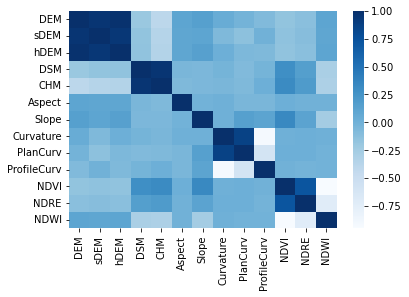

In [5]:
df_corr = df.drop(["Wetland", "Habitat", 'x', 'y'], axis=1)
corr = df_corr.corr()
sns.heatmap(corr, cmap="Blues")

In [6]:
wetland_corr = df.drop(['Habitat', 'x', 'y'], axis=1).corr()
df_corr = pd.DataFrame(wetland_corr['Wetland'])
df_corr = df_corr[:-1].sort_values(by=["Wetland"])
pd.set_option('display.max_rows', None)
df_corr

,Wetland
DEM,-0.309169
sDEM,-0.284855
hDEM,-0.247305
NDWI,-0.075971
NDRE,-0.046867
ProfileCurv,-0.022779
Aspect,-0.009000
PlanCurv,0.010538
Curvature,0.019308
NDVI,0.171811


In [7]:
df.to_csv('CastleBay.csv')